In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os 


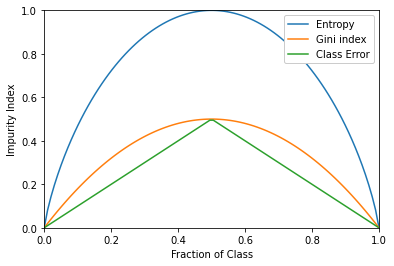

In [3]:
fractions = np.linspace(0, 1, 100) 

#Information entropy
entropies=[-(f*np.log2(f)+(1-f)*np.log2(1-f)) if f!=0 and f!=1 else 0 for f in fractions]

#Gini impurity
impurity=[1-f**2-((1-f)**2) for f in fractions]

#Classification error
classification=[1-max(f,1-f) for f in fractions]


plt.plot(fractions,entropies,label='Entropy')
plt.plot(fractions,impurity,label='Gini index')
plt.plot(fractions,classification,label='Class Error')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Fraction of Class')
plt.ylabel('Impurity Index')
plt.legend(loc='upper right',framealpha=1.0)
plt.show()

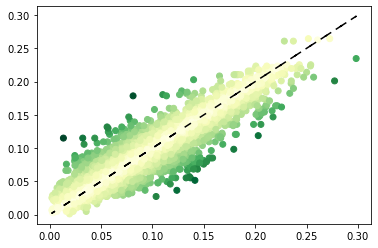

In [7]:
reg=np.loadtxt('reg.mlz')
rzspec=reg[:,0]
rzphot=reg[:,1] #using mode
lineref=rzspec
diff=np.abs(rzspec-rzphot)

plt.scatter(rzspec,rzphot,c=diff,cmap='YlGn')
plt.plot(rzspec,lineref,'k--',marker=None,dashes=[5,7])

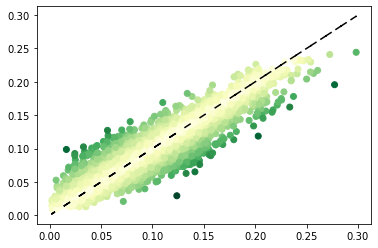

In [8]:
clas=np.loadtxt('class.mlz')
czspec=clas[:,0]
czphot=clas[:,2] #using median 
dif=np.abs(czspec-czphot)

plt.scatter(czspec,czphot,c=dif,cmap='YlGn')
plt.plot(czspec,lineref,'k--',marker=None,dashes=[5,7])

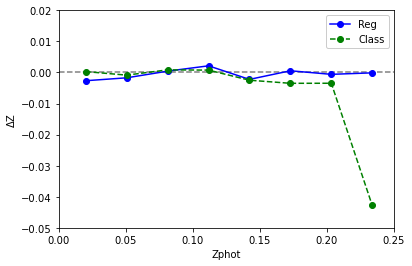

In [11]:
rzdelta=(rzphot-rzspec)
czdelta=(czphot-czspec)

bins = np.linspace(0.02, np.max(rzphot), 9)
mean_r=[]
mean_c=[]

for index in range(len(bins) - 1):
    bin_lower = bins[index]
    bin_upper = bins[index + 1]
    
    values_r = rzdelta[(rzphot >= bin_lower) & (rzphot <= bin_upper)]
    values_c = czdelta[(czphot >= bin_lower) & (czphot <= bin_upper)]
    
    
    mean_r.append(sum(values_r)/len(values_r)) #average of points inside each bin
    
    if len(values_c)==0: #avoinding error in classification
        mean_c.append(0)
    else:
        mean_c.append(sum(values_c)/len(values_c)) 

        
plt.axhline(0,color='k',linestyle='--',alpha=0.5)
plt.plot(bins[:-1],mean_r,'bo-',label='Reg')
plt.plot(bins[:-1],mean_c,'go--',label='Class')
plt.xlabel('Zphot')
plt.ylabel('ΔZ')
plt.axis(xmin=0,xmax=0.25,ymin=-0.05,ymax=0.02)
plt.legend(loc='upper right',framealpha=1.0)